# Heart Disease Dataset
## AML - 1114  - Data Science and Machine Learning

### Anil - C0938253
### Richard Roy - C0932997
### Mahidhar Rao Katragadda - C0936754
## Vijay - C0913018
## Jignesh - C0935085

# Introduction


# Abstract

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Heart_df = pd.read_csv("C://Users//Administrator//Downloads//1_1st dataset heart disease (1).csv")

### *Data Exploration*

In [3]:
# To get the dimension of the dataset
print('The shape of the data set is ',Heart_df.shape)

The shape of the data set is  (1190, 12)


In [4]:
Heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# this value is goes on increase from 1 to 4. linearly increasing.

In [5]:
#printing the list of columns in the dataset
Heart_df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

<Axes: >

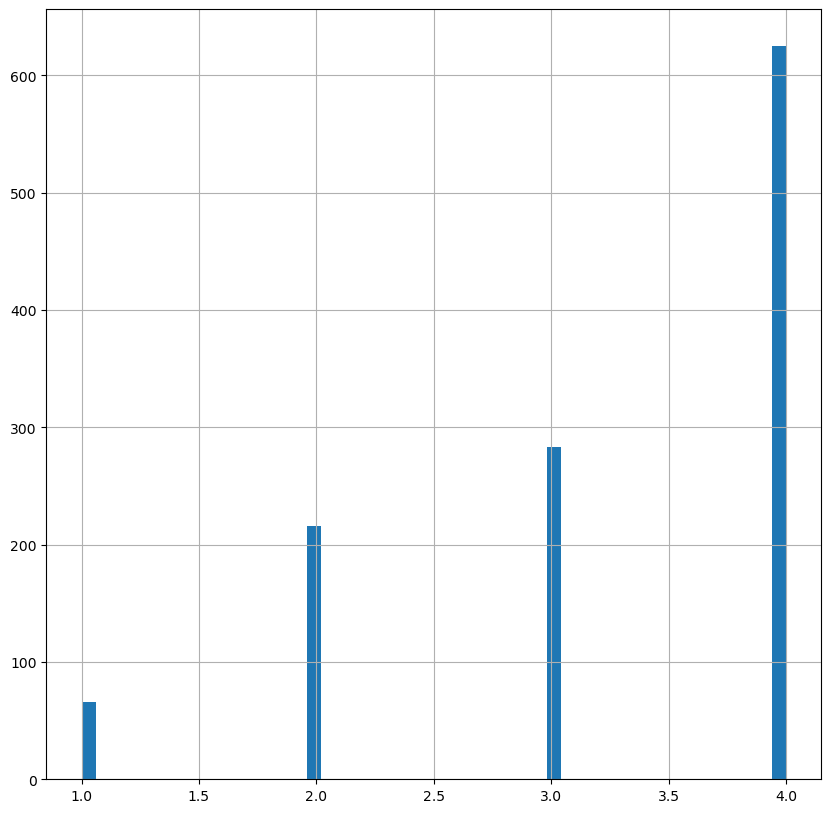

In [12]:
## Analyse the continuous values by creating histograms to understand the distribution
Heart_df['chest pain type'].hist(bins=50, figsize=(10,10))

#### From the above information, our dataset doesn't contain any object datatype as all the columns are of type numerical

In [7]:
Heart_df.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

In [8]:
Heart_df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

#### There are no null values present in the dataset

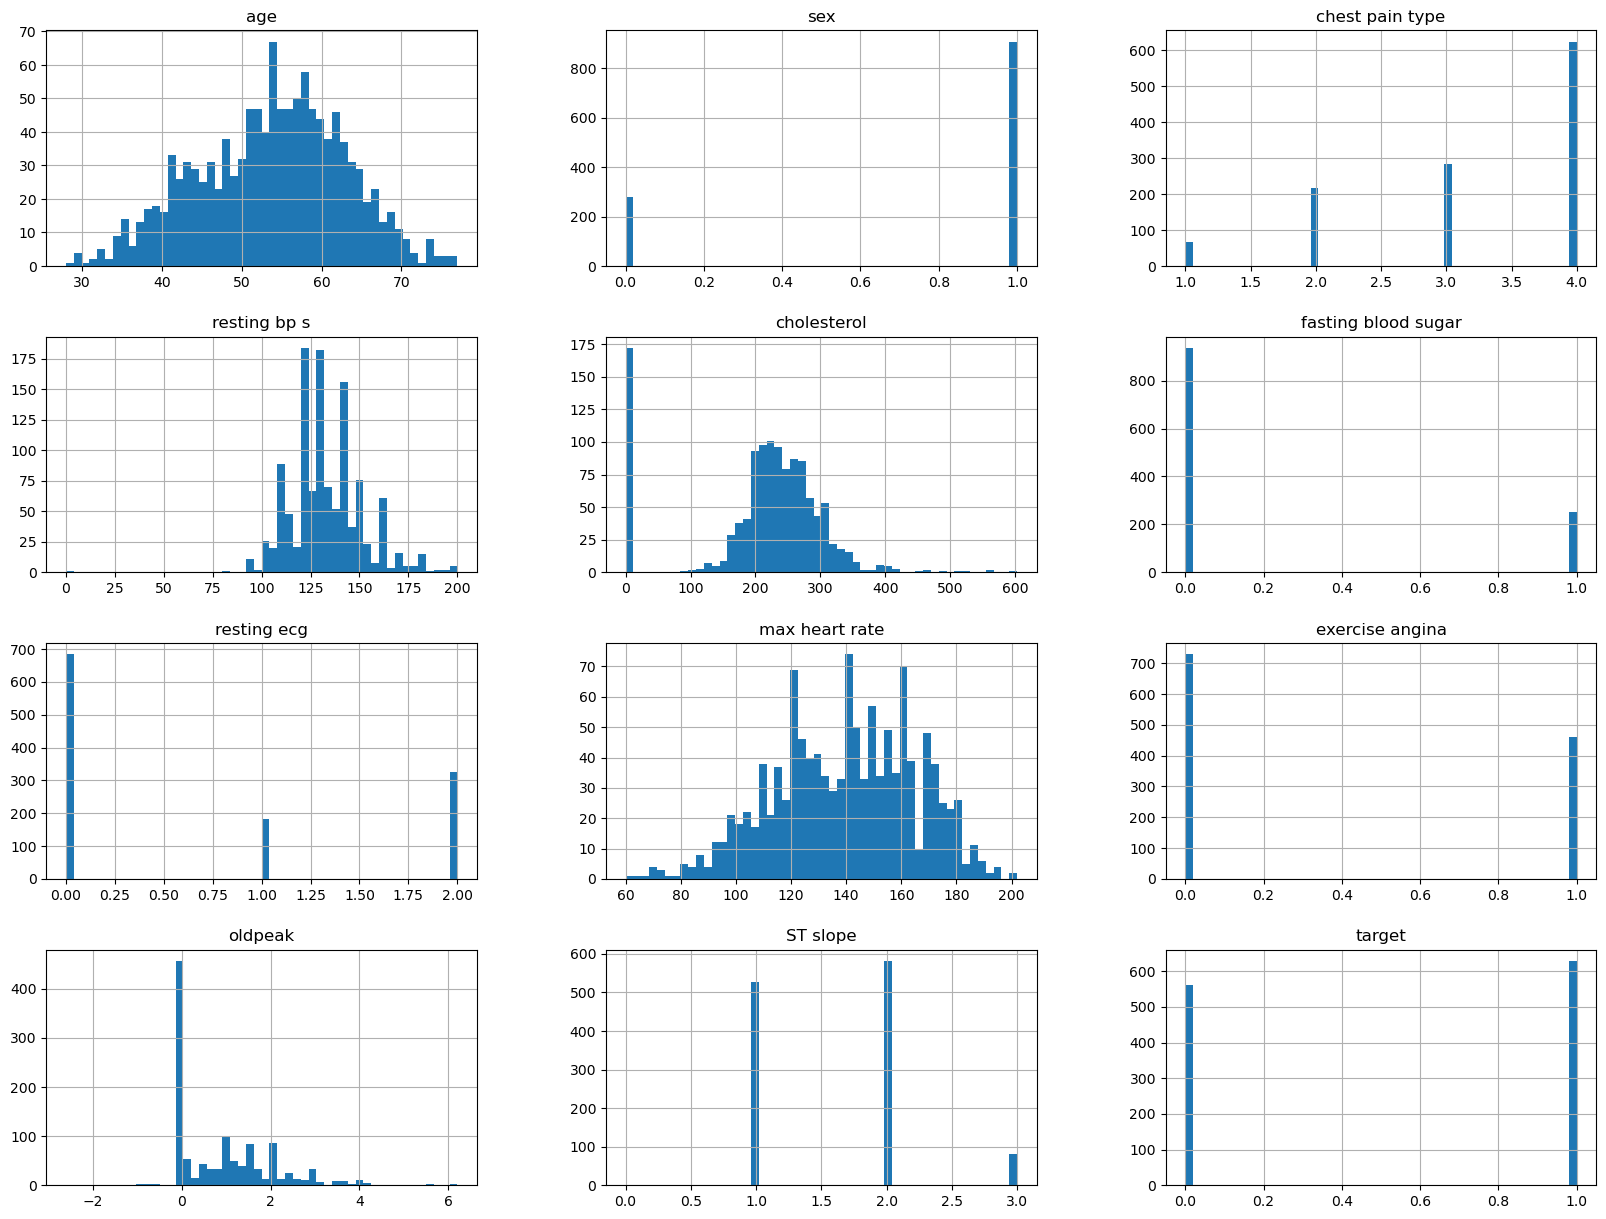

In [9]:
## Analyse the continuous values by creating histograms to understand the distribution
Heart_df.hist(bins=50, figsize=(20,15))
plt.show()

#### We can see that sex, chest pain type ,resting ecg, exercise angina, ST slope  and target are categorical fields 

<Axes: >

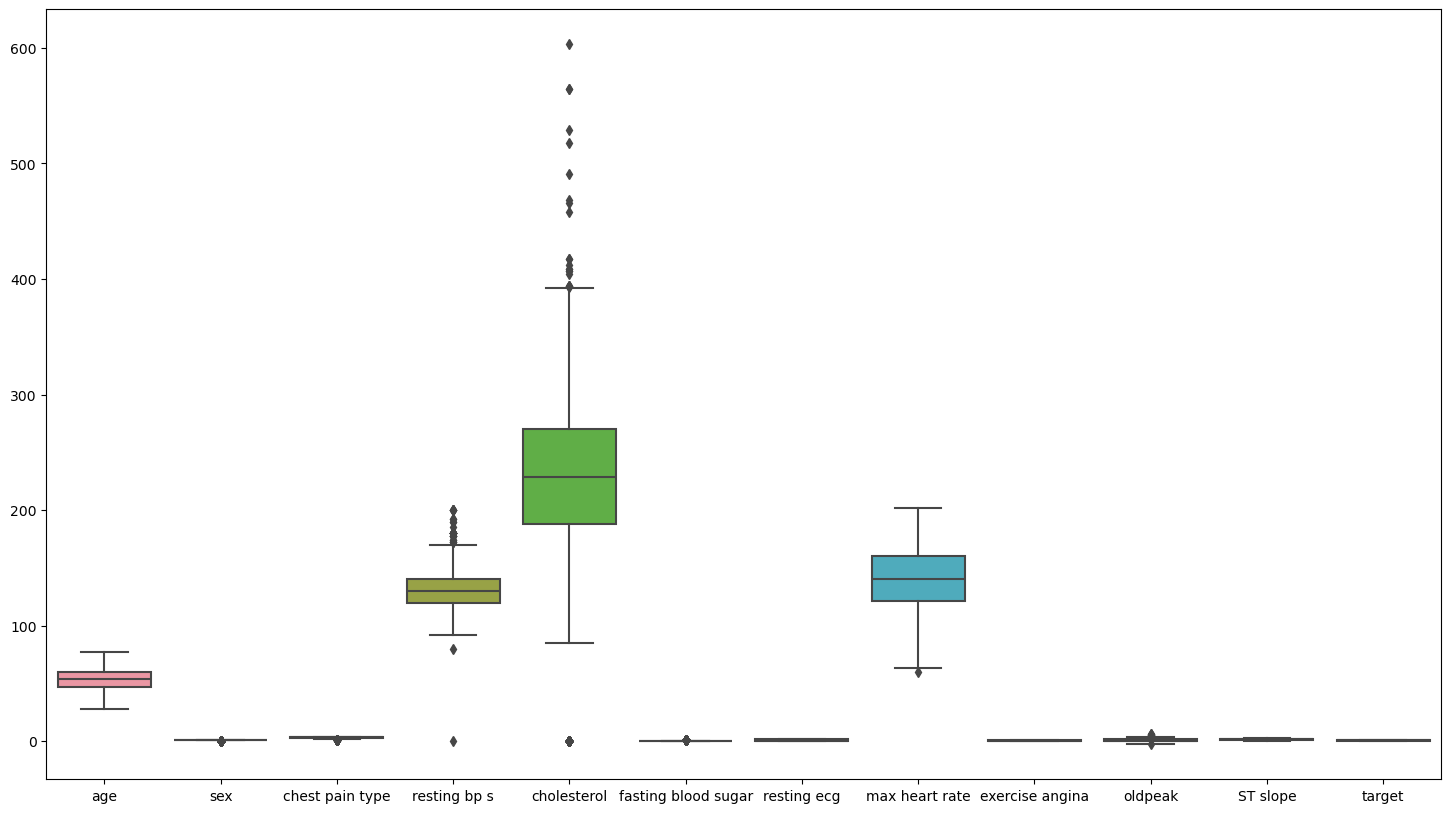

In [10]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=Heart_df)

###  

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


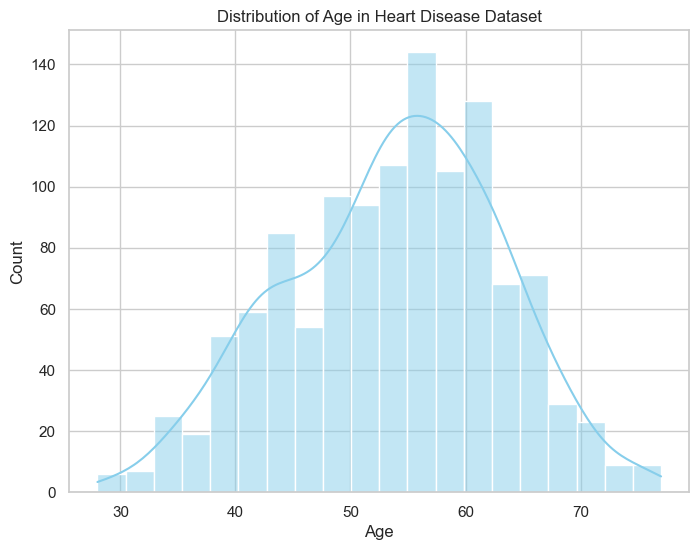

In [13]:
# Create a distribution plot for age
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(Heart_df, x='age', bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age in Heart Disease Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

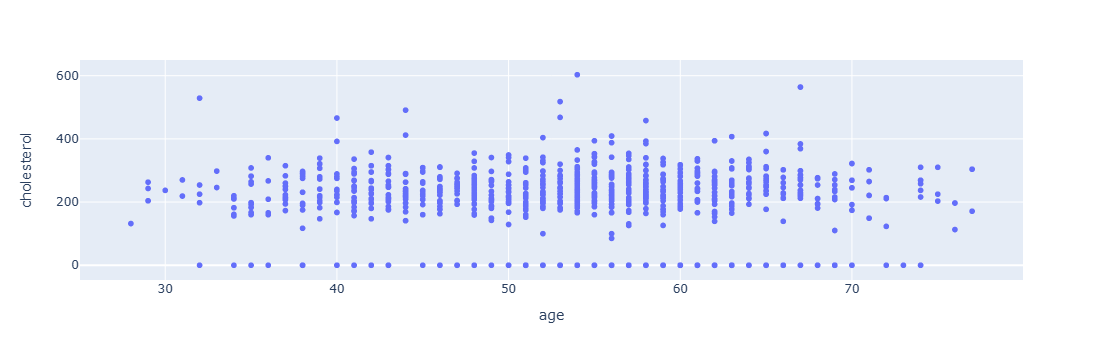

In [14]:
import plotly.express as px

# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="age", y="cholesterol", hover_data=['age', 'cholesterol'])
fig.show()


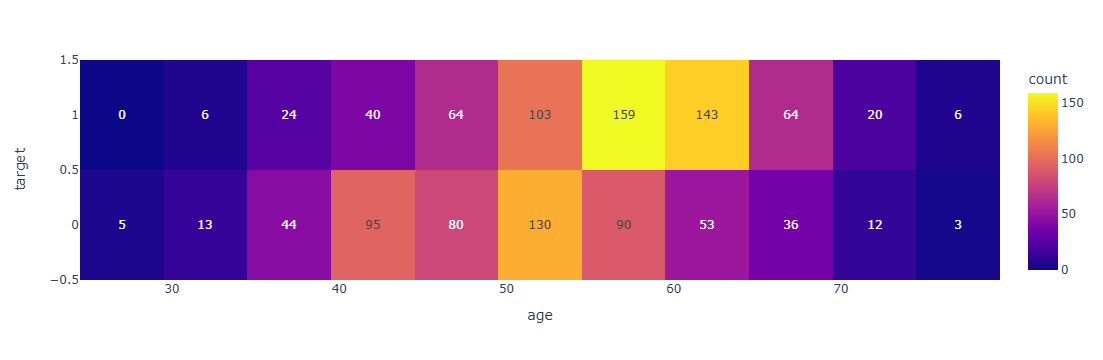

In [15]:
fig = px.density_heatmap(Heart_df, x="age", y="target", text_auto=True)
fig.show()

### 

In [16]:
# sex
Heart_df['sex'].value_counts().sort_index()

sex
0    281
1    909
Name: count, dtype: int64

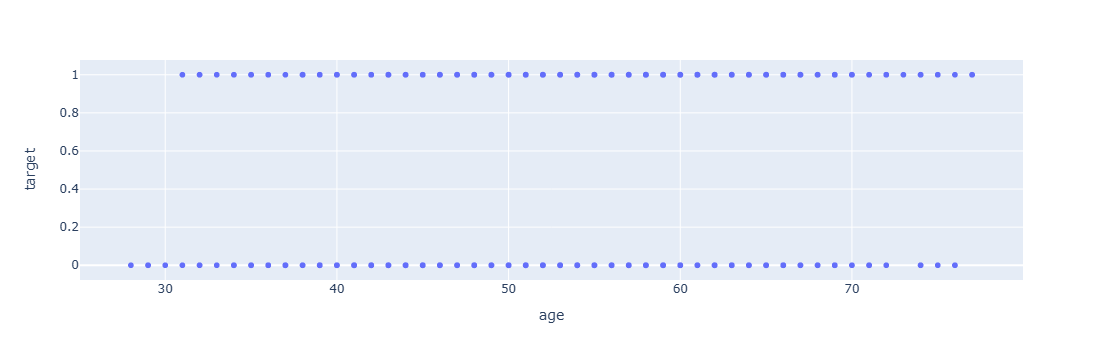

In [17]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="age", y="target", hover_data=['age', 'cholesterol'])
fig.show()


# we can see the heart disease above the age 31

In [18]:
Heart_df['chest pain type'].value_counts().sort_index()

chest pain type
1     66
2    216
3    283
4    625
Name: count, dtype: int64

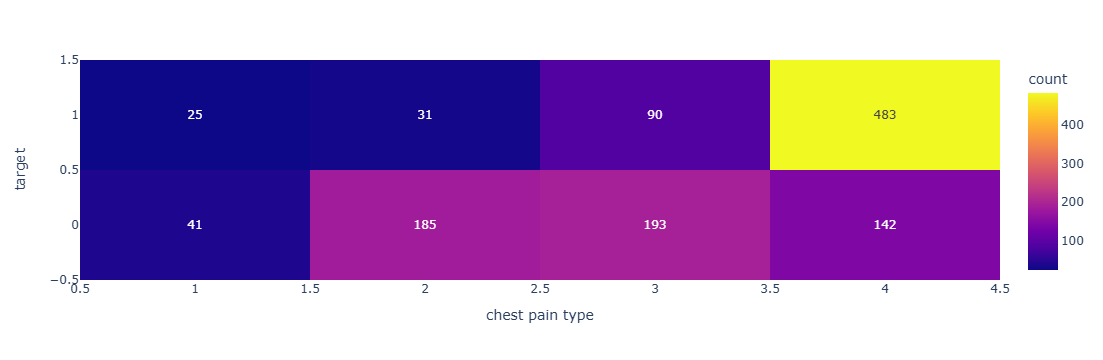

In [19]:
fig = px.density_heatmap(Heart_df, x="chest pain type", y="target", text_auto=True)
fig.show()

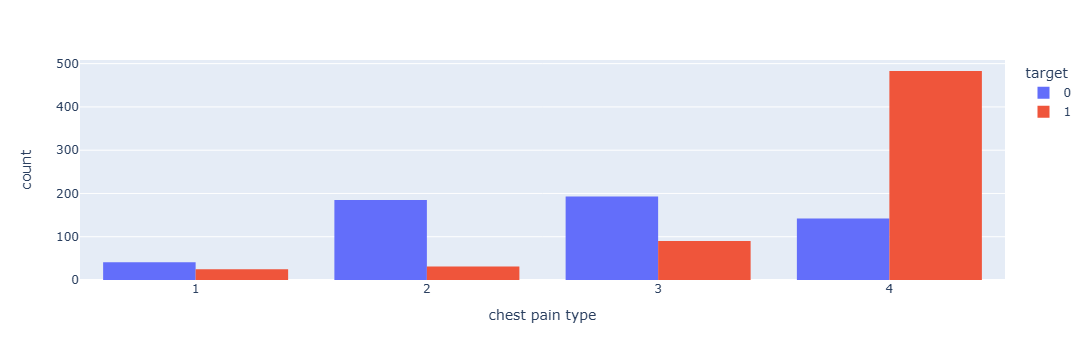

In [20]:
fig = px.histogram(Heart_df, x="chest pain type", color="target", barmode='group')
fig.show()

In [21]:
fig = px.histogram(df, x="chest pain type", color="age_group", barmode='group')
fig.show()

NameError: name 'df' is not defined

# from both group we can say that --chest pain increases with age and more chance to have hear-attack

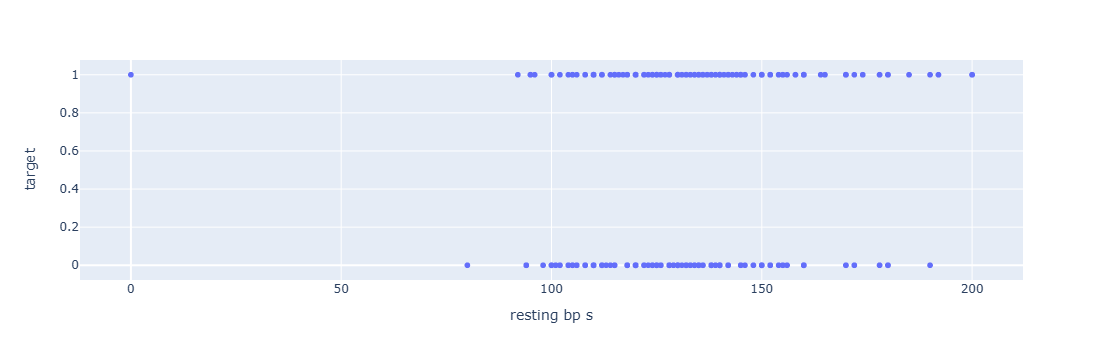

In [22]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="resting bp s", y="target", hover_data=['resting bp s', 'target'])
fig.show()


In [ ]:
# we can delete the data below 100 and above 180.

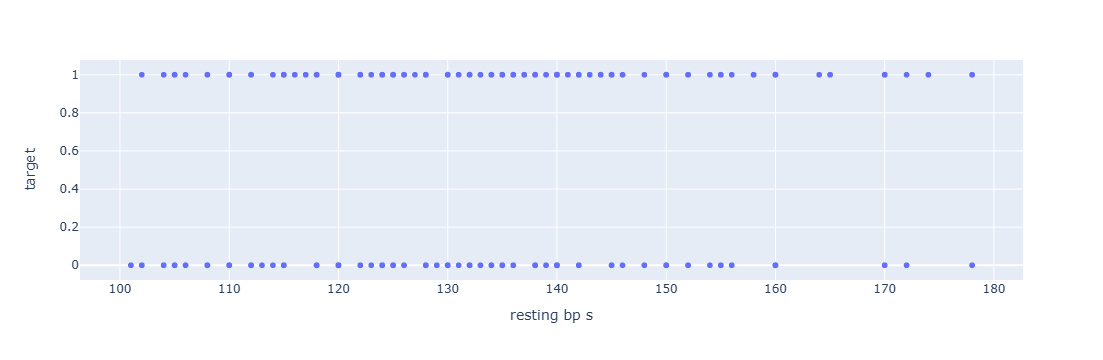

In [30]:
# Filter the DataFrame to keep only rows where 'resting bp s' is between 100 and 180
filtered_df = Heart_df[(Heart_df['resting bp s'] > 100) & (Heart_df['resting bp s'] < 180)]

fig = px.scatter(filtered_df, x="resting bp s", y="target", hover_data=['resting bp s', 'target'])
fig.show()


<Axes: >

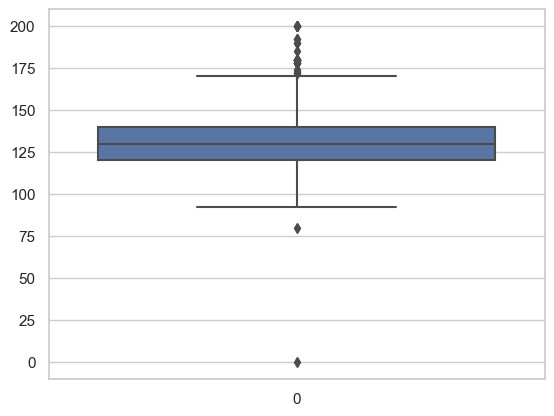

In [31]:
sns.boxplot(Heart_df['resting bp s'])

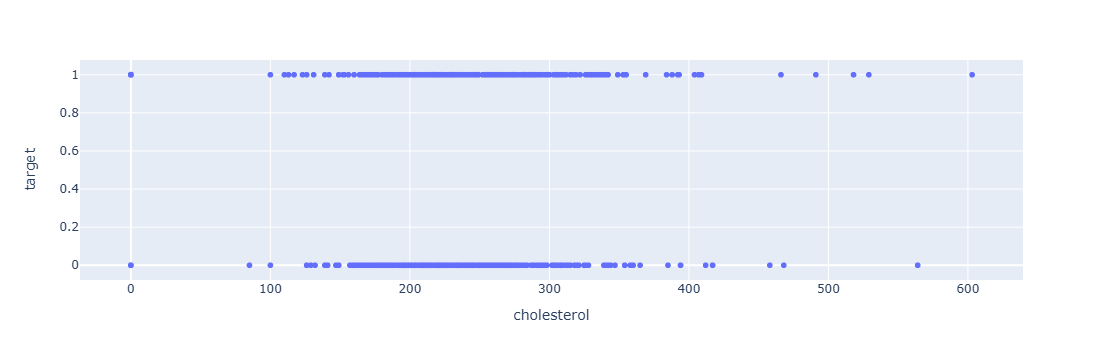

In [33]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="cholesterol", y="target", hover_data=['cholesterol', 'target'])
fig.show()


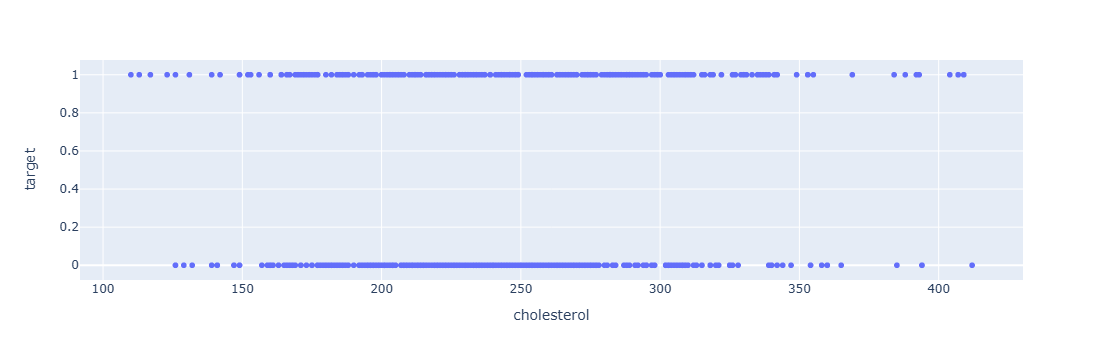

In [38]:
# from 100 and 417.
# Filter the DataFrame to keep only rows where 'resting bp s' is between 100 and 180
Heart_df = Heart_df[(Heart_df['cholesterol'] > 100) & (Heart_df['cholesterol'] <417)]

fig = px.scatter(Heart_df, x='cholesterol', y="target", hover_data=['cholesterol', 'target'])
fig.show()

<Axes: >

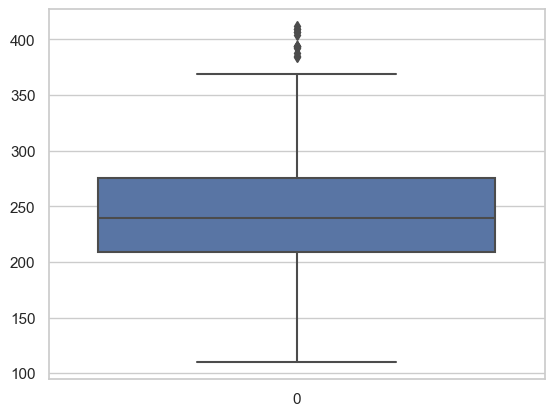

In [39]:
sns.boxplot(Heart_df['cholesterol'])

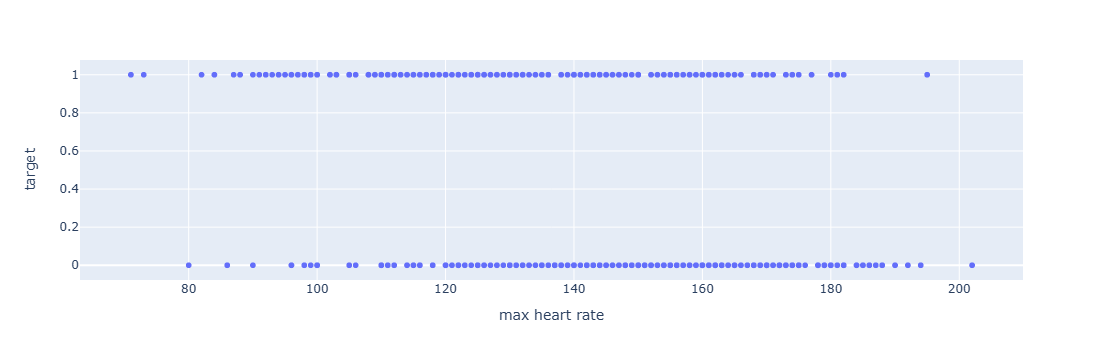

In [40]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="max heart rate", y="target", hover_data=['max heart rate', 'target'])
fig.show()


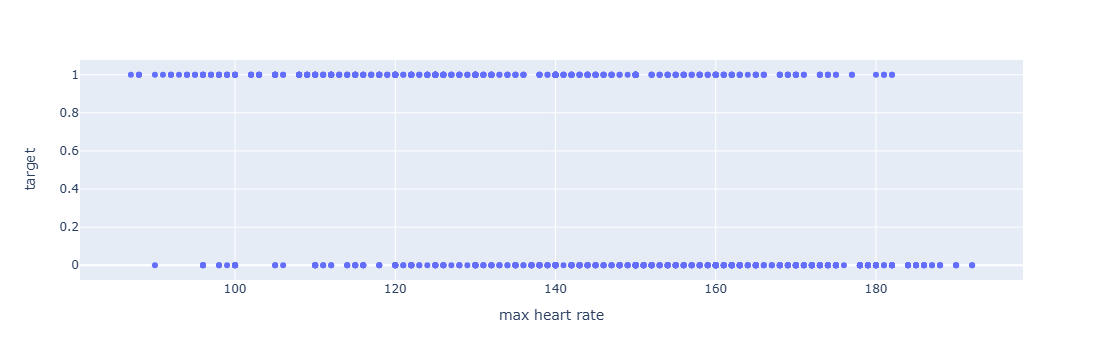

In [41]:
# we can delete 0 from 96 to 194
Heart_df = Heart_df[(Heart_df['max heart rate'] > 86) & (Heart_df['max heart rate'] <194)]

fig = px.scatter(Heart_df, x='max heart rate', y="target", hover_data=['max heart rate', 'target'])
fig.show()

<Axes: >

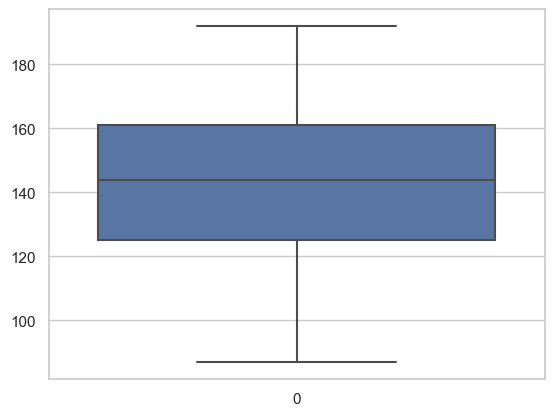

In [42]:
sns.boxplot(Heart_df['max heart rate'])

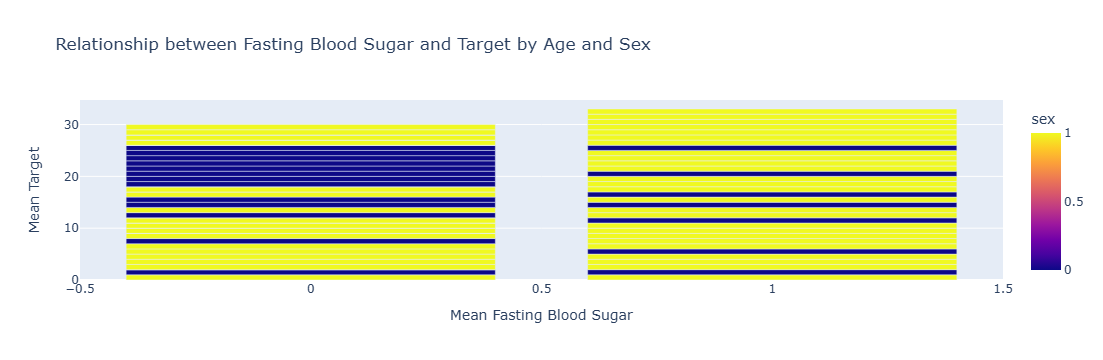

In [79]:
import pandas as pd
import plotly.express as px

# Assuming Heart_df is already loaded

# Group by 'age' and 'sex', then calculate the mean of 'fasting blood sugar' and 'target'
grouped_df = Heart_df.groupby(['age', 'sex']).agg({
    'fasting blood sugar': 'max',
    'target': 'max'
}).reset_index()

# Plotting the grouped data
fig = px.bar(grouped_df, x='fasting blood sugar', y='target', color='sex', 
                 title='Relationship between Fasting Blood Sugar and Target by Age and Sex',
                 labels={'fasting blood sugar': 'Mean Fasting Blood Sugar', 'target': 'Mean Target'},
                 hover_data=['age', 'sex'])

fig.show()


# male 1 has mostly affected by the heart attack

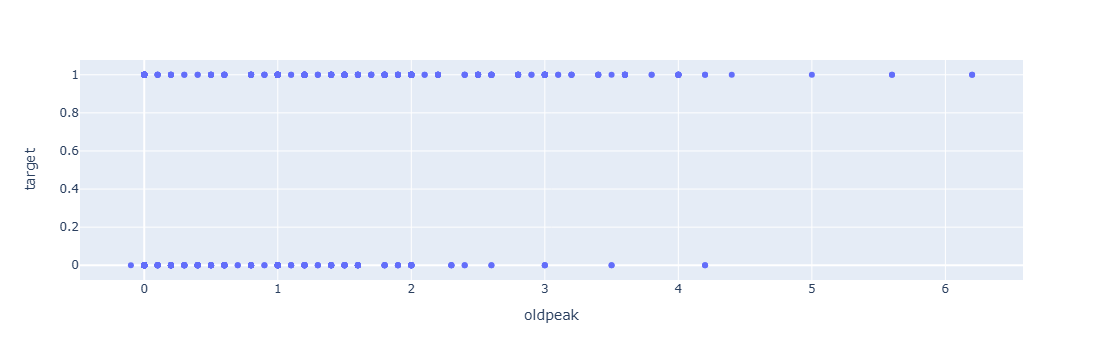

In [47]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="oldpeak", y="target", hover_data=['oldpeak', 'target'])
fig.show()


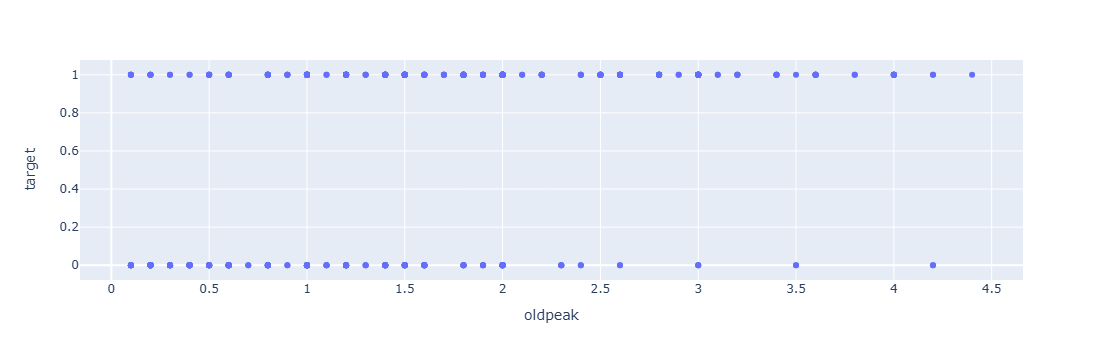

In [50]:
# we can delete some part from 0 and 1 
# we can delete 0 from 96 to 194
Heart_df = Heart_df[(Heart_df["oldpeak"] >=0) & (Heart_df["oldpeak"] <5)]

fig = px.scatter(Heart_df, x="oldpeak", y="target", hover_data=["oldpeak", 'target'])
fig.show()

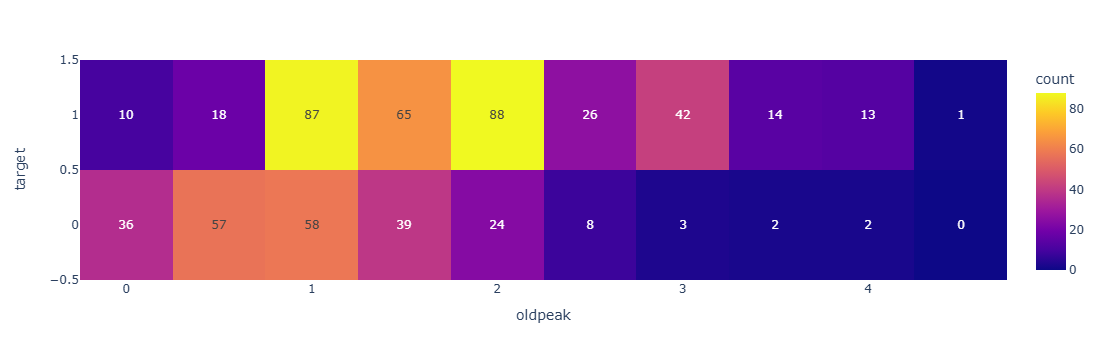

In [52]:
fig = px.density_heatmap(Heart_df, x="oldpeak", y="target", text_auto=True)
fig.show()

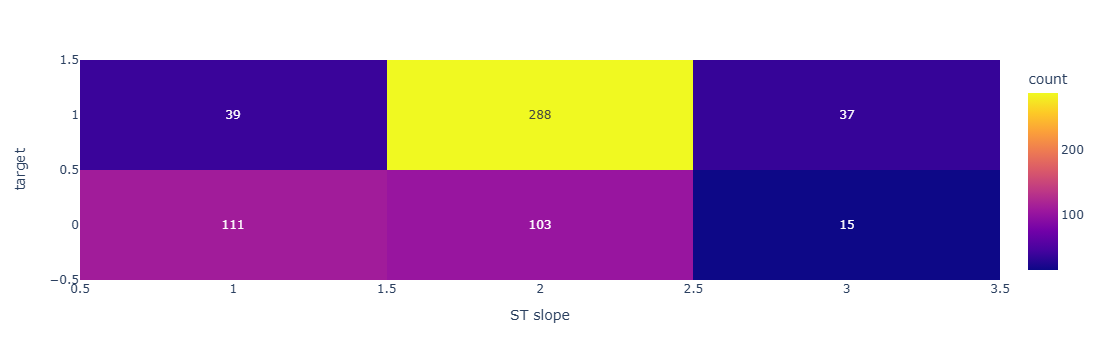

In [53]:
fig = px.density_heatmap(Heart_df, x="ST slope", y="target", text_auto=True)
fig.show()

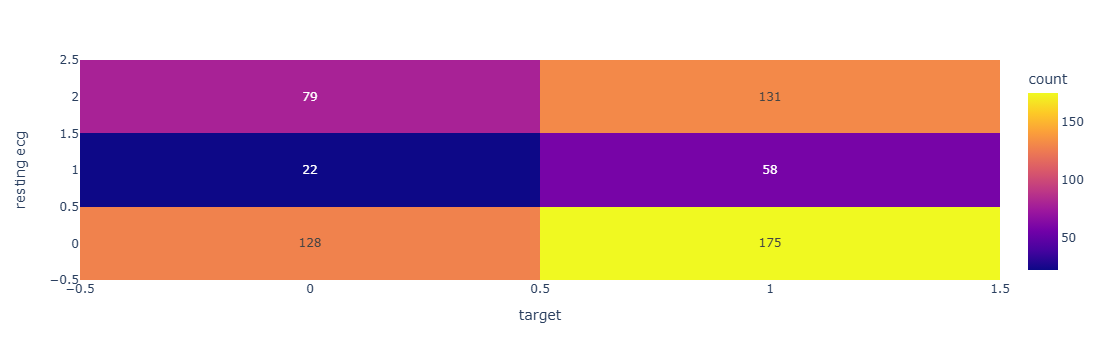

In [54]:
fig = px.density_heatmap(Heart_df, x="target", y="resting ecg", text_auto=True)
fig.show()

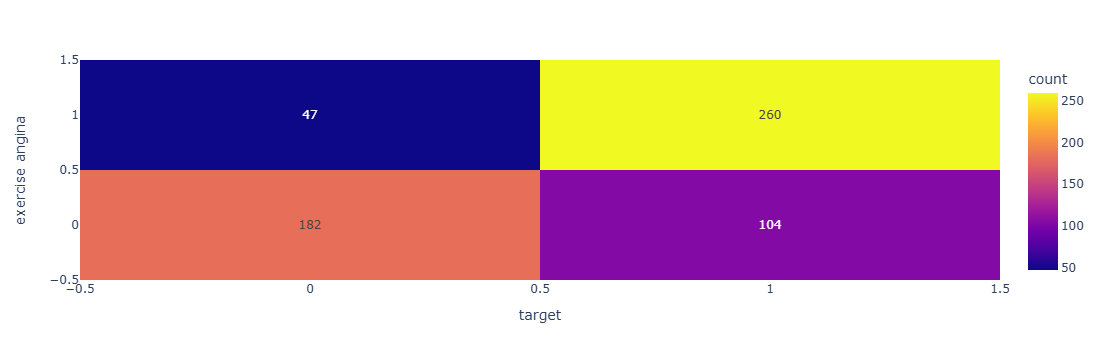

In [55]:
fig = px.density_heatmap(Heart_df, x="target", y="exercise angina", text_auto=True)
fig.show()

In [56]:
# target
Heart_df['target'].value_counts().sort_index()

target
0    229
1    364
Name: count, dtype: int64

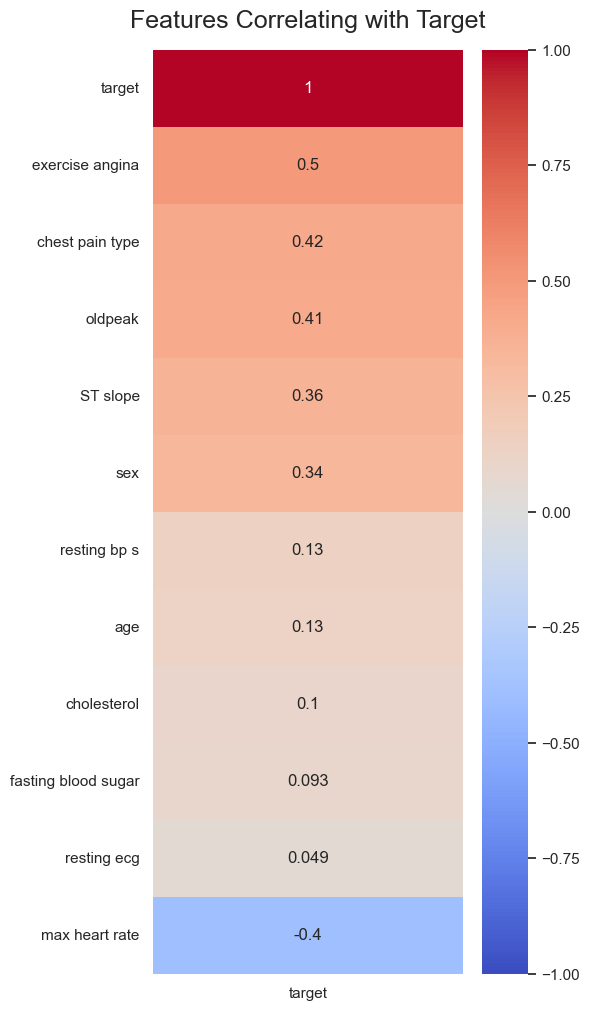

In [58]:
plt.figure(figsize=(5, 12))
heatmap = sns.heatmap(Heart_df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

In [59]:
Heart_df.corr()

age       sex  chest pain type  resting bp s  \
age                  1.000000  0.019722         0.012545      0.220449   
sex                  0.019722  1.000000         0.092722     -0.032400   
chest pain type      0.012545  0.092722         1.000000     -0.032208   
resting bp s         0.220449 -0.032400        -0.032208      1.000000   
cholesterol          0.054993 -0.158468         0.089679      0.170357   
fasting blood sugar  0.162407  0.130925        -0.029814      0.247920   
resting ecg          0.162169  0.000871         0.001730      0.061698   
max heart rate      -0.295132 -0.151416        -0.373662     -0.092405   
exercise angina      0.027714  0.222753         0.421846      0.088518   
oldpeak              0.060047  0.133058         0.164619      0.169965   
ST slope             0.068943  0.092654         0.191611      0.100529   
target               0.129304  0.337857         0.418631      0.133638   

                     cholesterol  fasting blood sugar  resting ecg  \
age                     0.054993             0.162407     0.162169   
sex                    -0.158468             0.130925     0.000871   
chest pain type         0.089679            -0.029814     0.001730   
resting bp s            0.170357             0.247920     0.061698   
cholesterol             1.000000            -0.008467     0.071284   
fasting blood sugar    -0.008467             1.000000     0.081636   
resting ecg             0.071284             0.081636     1.000000   
max heart rate         -0.040468            -0.016563     0.023701   
exercise angina         0.098725             0.052547    -0.047314   
oldpeak                 0.072297            -0.026763     0.065210   
ST slope                0.034808             0.086641     0.113799   
target                  0.100013             0.093375     0.049439   

                     max heart rate  exercise angina   oldpeak  ST slope  \
age                       -0.295132         0.027714  0.060047  0.068943   
sex                       -0.151416         0.222753  0.133058  0.092654   
chest pain type           -0.373662         0.421846  0.164619  0.191611   
resting bp s              -0.092405         0.088518  0.169965  0.100529   
cholesterol               -0.040468         0.098725  0.072297  0.034808   
fasting blood sugar       -0.016563         0.052547 -0.026763  0.086641   
resting ecg                0.023701        -0.047314  0.065210  0.113799   
max heart rate             1.000000        -0.424339 -0.155058 -0.262259   
exercise angina           -0.424339         1.000000  0.279560  0.299855   
oldpeak                   -0.155058         0.279560  1.000000  0.442224   
ST slope                  -0.262259         0.299855  0.442224  1.000000   
target                    -0.396580         0.495990  0.406304  0.359848   

                       target  
age                  0.129304  
sex                  0.337857  
chest pain type      0.418631  
resting bp s         0.133638  
cholesterol          0.100013  
fasting blood sugar  0.093375  
resting ecg          0.049439  
max heart rate      -0.396580  
exercise angina      0.495990  
oldpeak              0.406304  
ST slope             0.359848  
target               1.000000

In [60]:
a=['target','age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 ]
df=Heart_df[a]

#### From above corr matrix we can see that the feature ST slove is highly correlated with oldpeak and exercise angina 
#### chest pain type and exercise angina had 52 % positive correlation.

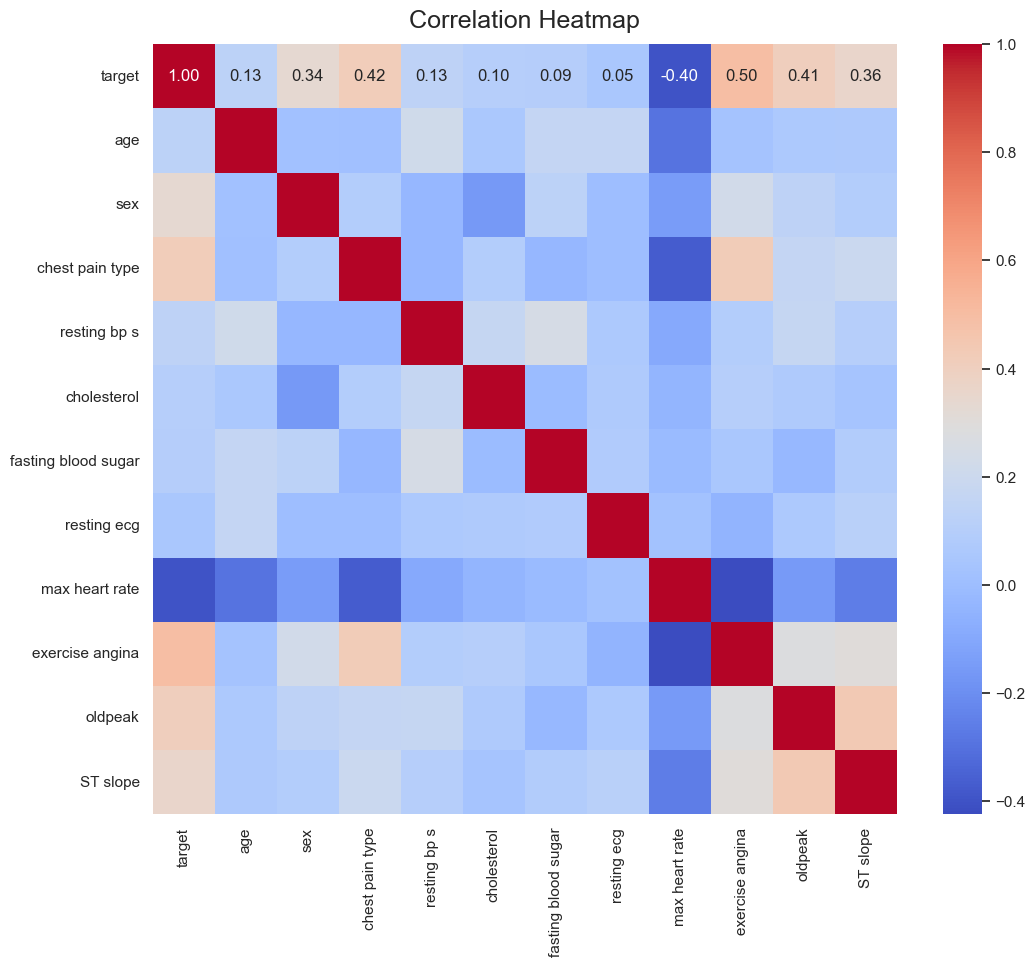

In [61]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True,fmt=".2f", cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [63]:
df['exercise angina'].corr(df['chest pain type'])

0.42184587583428473

Binned Categories:

Age:
Young Adult: Ages 0-35
Middle-Aged Adult: Ages 36-55
Senior: Ages 56 and above

Cholesterol:
Desirable: Less than 200 mg/dL
Borderline High: 200-239 mg/dL
High: 240 mg/dL and above

#### 

In [64]:
# Binning for 'age'
age_bins = [0, 35, 55, 120]  # Covering range from 0 to 120 for completeness
age_labels = ['Young Adult', 'Middle-Aged Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Binning for 'cholesterol'
cholesterol_bins = [0, 200, 240, 1000]  # Covering up to 1000 for completeness
cholesterol_labels = ['Desirable', 'Borderline High', 'High']
df['cholesterol_group'] = pd.cut(df['cholesterol'], bins=cholesterol_bins, labels=cholesterol_labels, right=False)

# Show the first few rows to confirm binning
df[['age', 'age_group', 'cholesterol', 'cholesterol_group']].head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13812\694784542.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13812\694784542.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age          age_group  cholesterol cholesterol_group
1    49  Middle-Aged Adult          180         Desirable
3    48  Middle-Aged Adult          214   Borderline High
8    37  Middle-Aged Adult          207   Borderline High
11   58             Senior          164         Desirable
13   49  Middle-Aged Adult          234   Borderline High

In [65]:
from scipy.stats import chi2_contingency
# converting the 'target' into the categorical one
df['Target'] = df['target'].astype(str)
def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Apply Cramér's V for categorical variables against the target
categorical_columns = ['age', 'cholesterol_group']
cramers_v_results = {col: cramers_v(df[col], df['Target']) for col in categorical_columns}

cramers_v_results


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13812\3550335520.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'age': 0.2653082843815952, 'cholesterol_group': 0.10183033895462938}

In [66]:
# we can delete the age and cholesterol columns 
df['age']

#correlation is poor with target so we decided not to do the columns binning

del df['cholesterol_group'] 


1             Desirable
3       Borderline High
8       Borderline High
11            Desirable
13      Borderline High
             ...       
1183          Desirable
1184               High
1185               High
1186          Desirable
1187          Desirable
Name: cholesterol_group, Length: 593, dtype: category
Categories (3, object): ['Desirable' < 'Borderline High' < 'High']

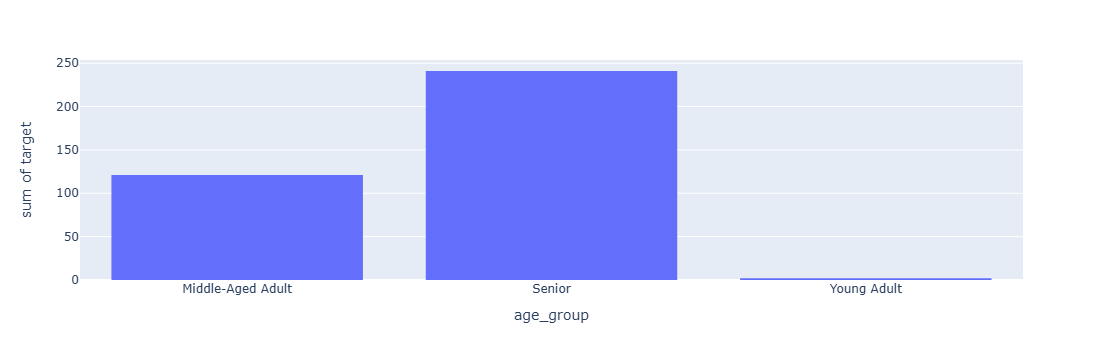

In [69]:
# we can delete 0 from 96 to 194
#Heart_df = Heart_df[(Heart_df['max heart rate'] > 86) & (Heart_df['max heart rate'] <194)]

fig = px.histogram(df, x='age_group', y="target", hover_data=['age_group', 'target'])
fig.show()

# here adult are less affected by target.